# 1 - Data Exploration

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
import src.utils as utils

## a) Load the dataset

We simply use the builtin `read_csv()` method from Pandas to read the CSV file into memory. The result of this operation is a Pandas DataFrame.

We can use `df.info()` to get some metadata about the DataFrame. We can see the amount of rows and columns along with their data types.

In [16]:
df = pd.read_csv("../data/StudentsPerformance.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We check out the first rows of the DataFrame by using `df.head()`. We can see from the previous section that there are 5 categorical features and 3 numerical features. Of the three numerical features there are test scores for math, reading and writing. The latter of which we will try to predict in this project.

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


To get an overview of the dataset's numeric features, we employ `df.describe()`

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Now that we have seen a statistical overview of the numerical data, let us check out the categories in each of the columns.

In [ ]:
# Filter out columns that contain "score" in their names
for col in filter(lambda x: "score" not in x, df.columns):
    print(f"Column: {col}")
    print(df[col].unique())
    print()

Column: gender
['female' 'male']

Column: race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']

Column: parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Column: lunch
['standard' 'free/reduced']

Column: test preparation course
['none' 'completed']



Three out of the five categorical features are binary. There are five different ethnicities and six levels of education of parents.

## b) Handle missing values or outliers

### I - Check for missing values

We can use `isna()` from Pandas to check for null values.

In [14]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

We can see that there are no missing value in any of the columns

### II - Check for duplicates

In [15]:
df.duplicated().sum()

np.int64(0)

We can also see that there are no duplicated rows in the DataFrame. 

### III - Check for outliers

There are no outliers in the categorical features. Let us check the numerical ones. We can do this with a box plot from Seaborn.


<Axes: >

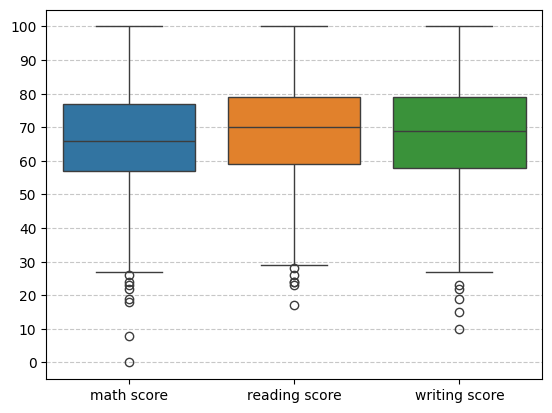

In [35]:
plt.yticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])

In [71]:
# Find outliers using IQR method, threshold set to 1.5
df_outliers = pd.concat(
    [
        utils.find_outliers_iqr(df, "math score"),
        utils.find_outliers_iqr(df, "reading score"),
        utils.find_outliers_iqr(df, "writing score"),
    ],
    axis=0,
).drop_duplicates()
print(f"Number of outliers: {df_outliers.shape[0]}")


Number of outliers: 12


There are some outliers in the test scores. Out of 1000 entries 12 seems like a realistic number of outliers, so we keep them in the dataset.

## c) Visualizing distribution of features

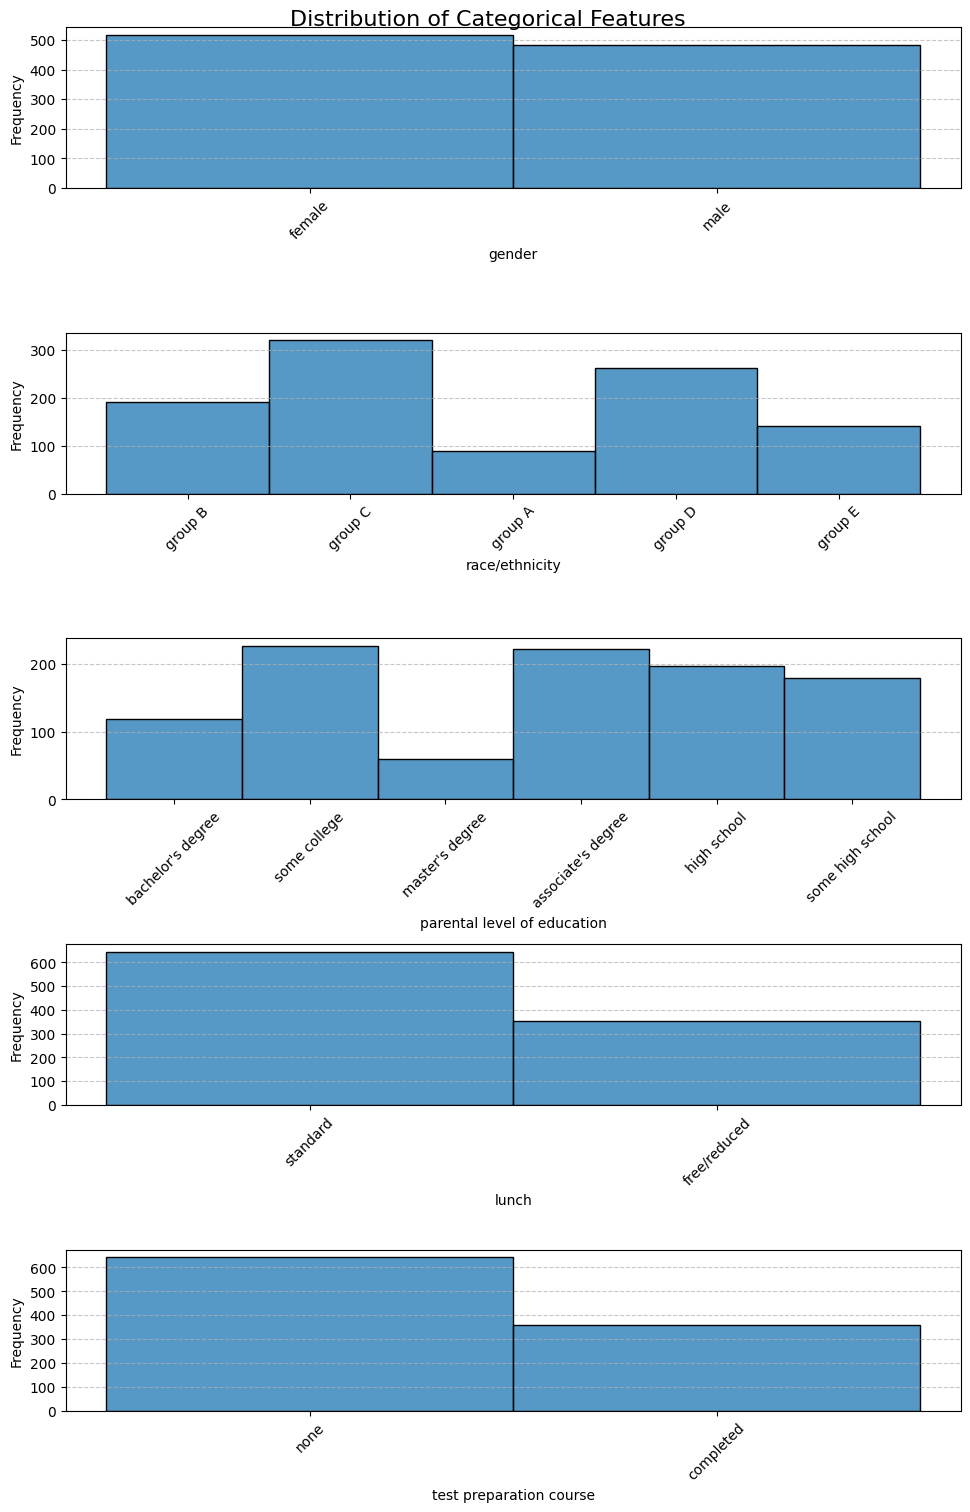

In [141]:
fig, axes = plt.subplots(ncols=1, nrows=len(list(filter(lambda x: "score" not in x, df.columns))), figsize=(10, 15))
fig.suptitle("Distribution of Categorical Features", fontsize=16)
for ax, col in zip(axes, filter(lambda x: "score" not in x, df.columns)):
    ax.set_xlabel(col)
    ax.set_yticks(range(0, 1001, 100))
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    fig.tight_layout(pad=1)
    sns.histplot(df[col], ax=ax)

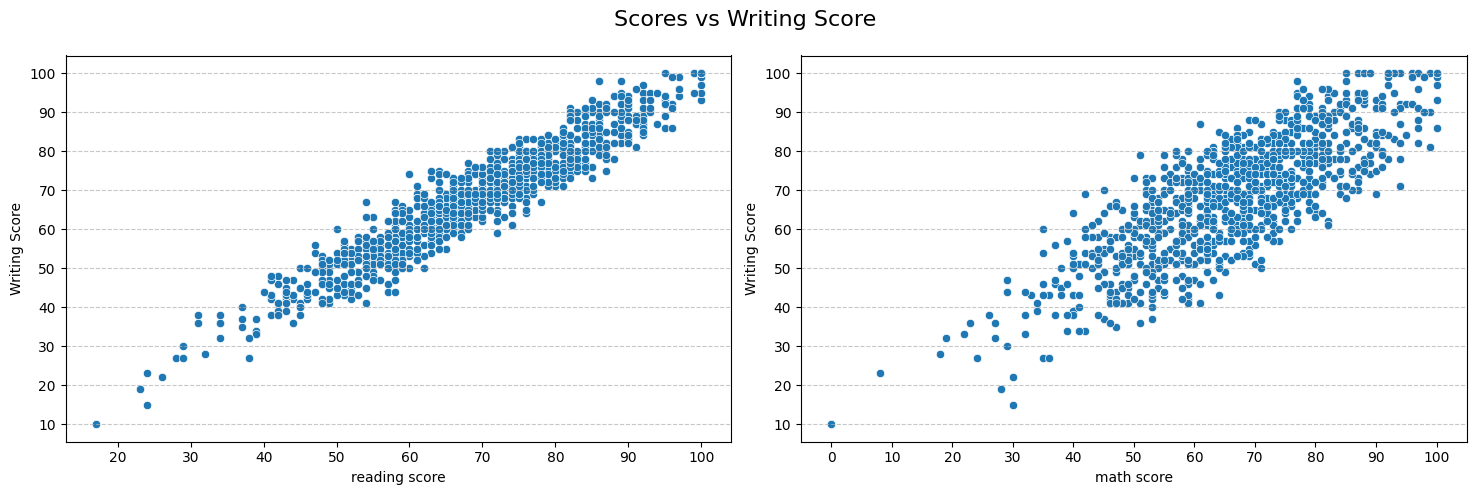

In [164]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
fig.suptitle("Scores vs Writing Score", fontsize=16)
for ax, col in zip(axes, ["reading score", "math score"]):
    ax.set_xlabel(col)
    ax.set_xticks(range(0, 101, 10))
    ax.set_yticks(range(0, 101, 10))
    ax.set_ylabel("Writing Score")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    fig.tight_layout(w_pad=1)
    sns.scatterplot(data=df, x=col, y="writing score", ax=ax)

<Axes: >

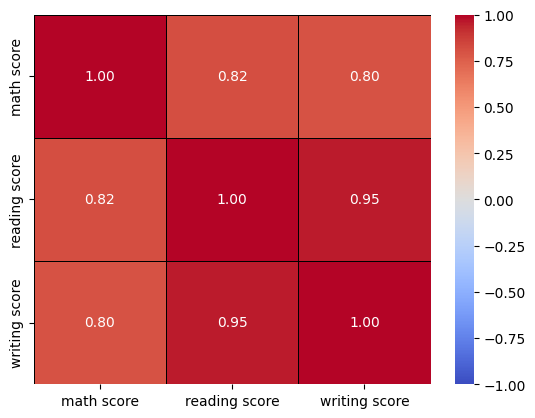

In [134]:
sns.heatmap(
    df[["math score", "reading score", "writing score"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='black'
)

<Axes: xlabel='gender', ylabel='reading score'>

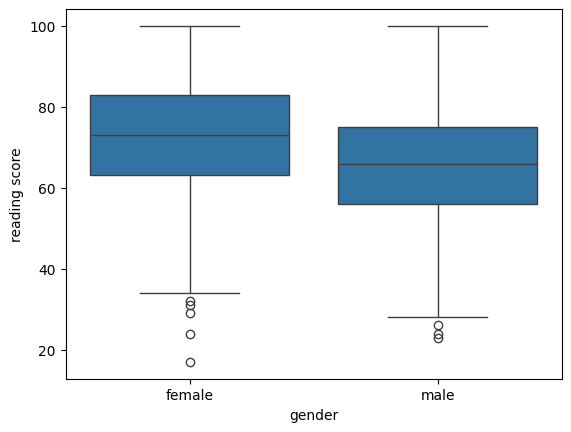

In [142]:
sns.boxplot(data=df, x="gender", y="reading score")

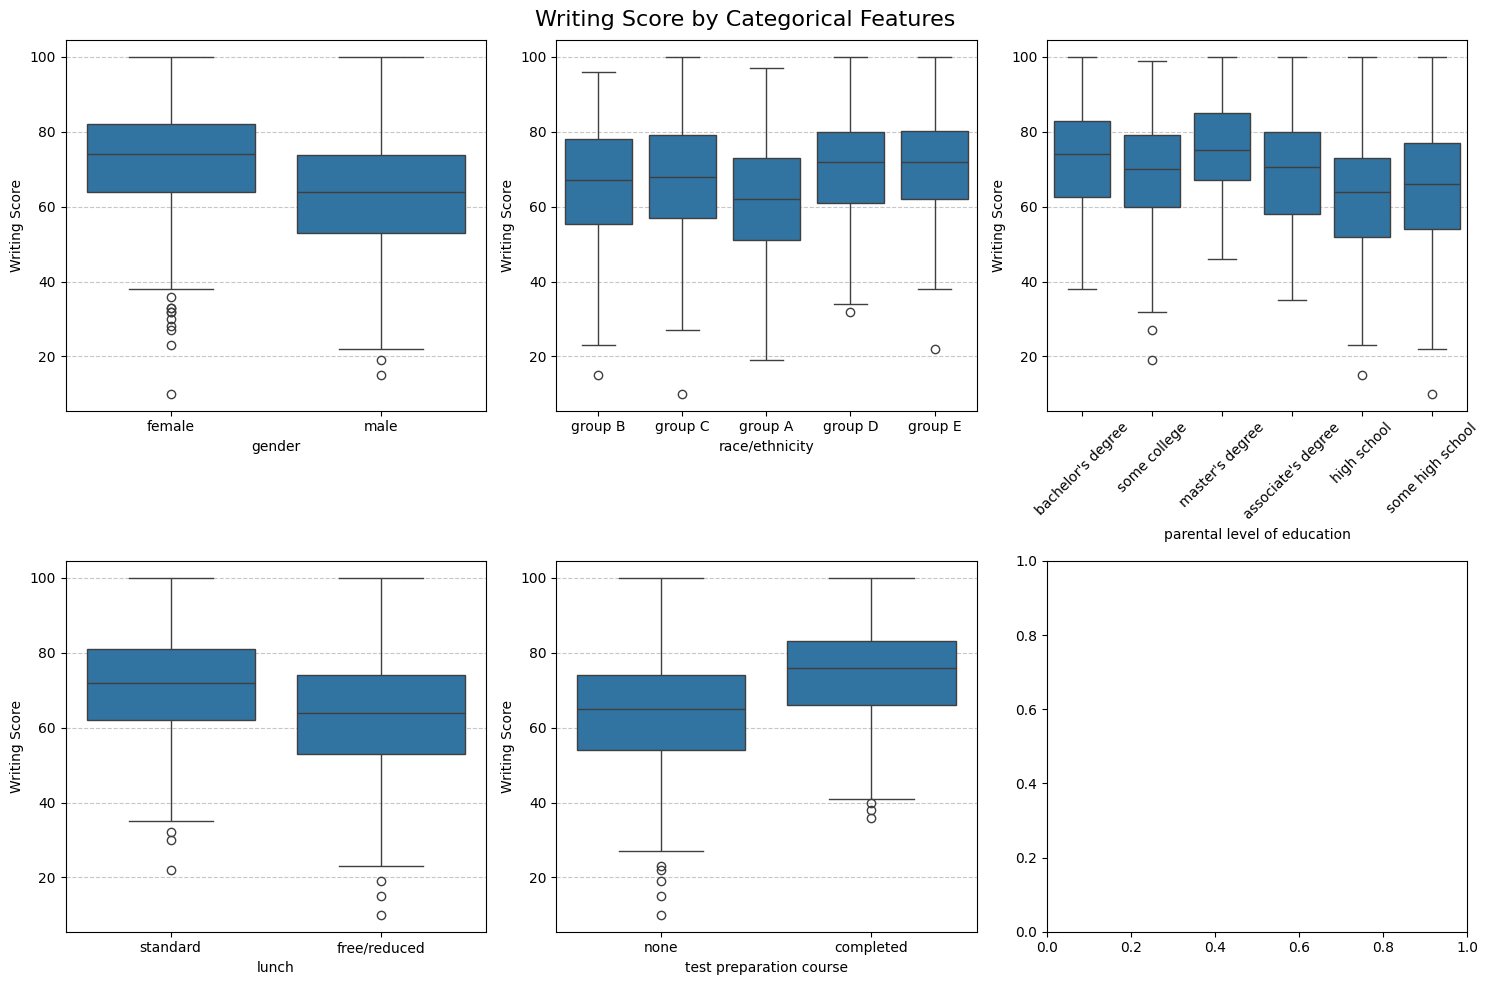

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

categorical_features = filter(lambda x: "score" not in x, df.columns)
fig.suptitle("Writing Score by Categorical Features", fontsize=16)

for ax, col in zip(axes.flatten(), categorical_features):
    if col == "parental level of education":
        ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col)
    ax.set_ylabel("Writing Score")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    fig.tight_layout(h_pad=1)
    sns.boxplot(data=df, x=col, y="writing score", ax=ax)